In [39]:
import numpy as np
import cv2 as cv
import glob

In [64]:
import os
import matplotlib.pyplot as plt
from PIL import Image
# scan all the JPEG frame names in this directory


In [75]:
calibration_dir = "/home/joseph/Documents/project/videos/calibration_images/Moto3G_calibration/"

frame_names = [
    p for p in os.listdir(calibration_dir)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]
frame_name_subset = frame_names

In [67]:
calibration_dir = "/home/joseph/Documents/project/videos/calibration_images/LG_calibration/20241110_152519_jpg/"

frame_names = [
    p for p in os.listdir(calibration_dir)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]
frame_names.sort(key=lambda p: int(os.path.splitext(p)[0]))

img_count = len(frame_names)
print(img_count)

desired_samples = 60
skip_step = int(np.round(img_count / desired_samples))

print("skip_step",skip_step)

frame_name_subset = frame_names[::skip_step]
print(len(frame_name_subset))

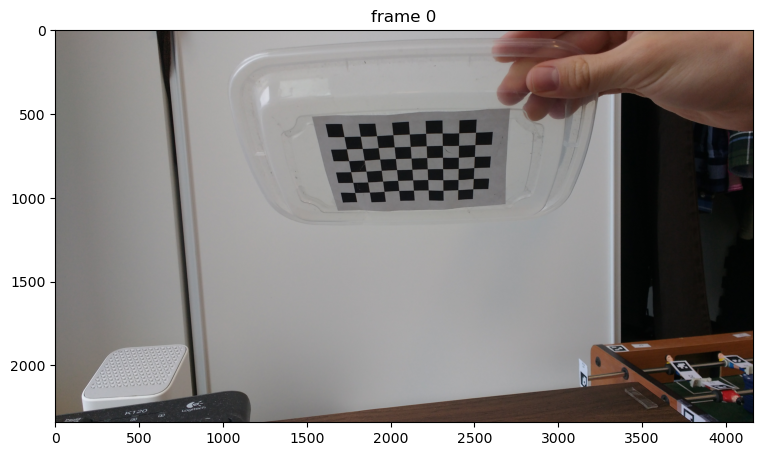

In [69]:
# take a look the first video frame
frame_idx = 0
plt.figure(figsize=(9, 6))
plt.title(f"frame {frame_idx}")
plt.imshow(Image.open(os.path.join(calibration_dir, frame_names[frame_idx])))

/tmp/ipykernel_181292/951677134.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 4))


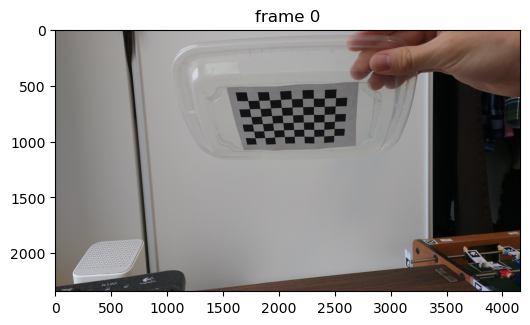

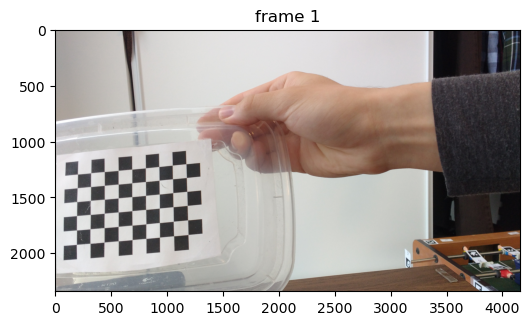

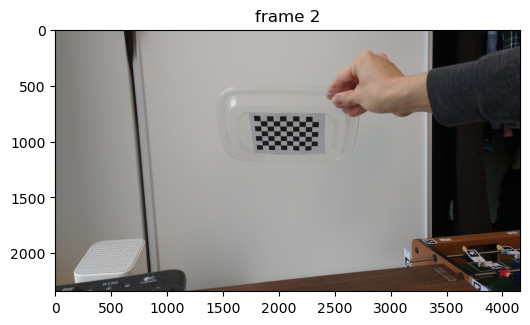

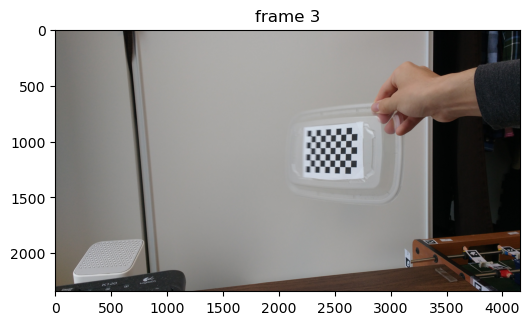

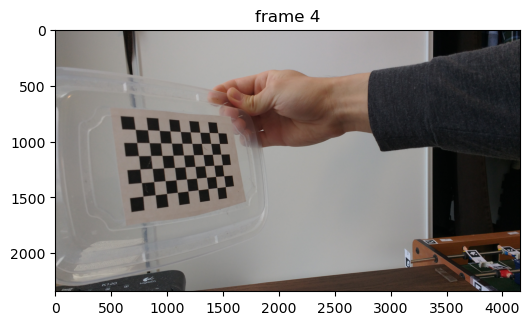

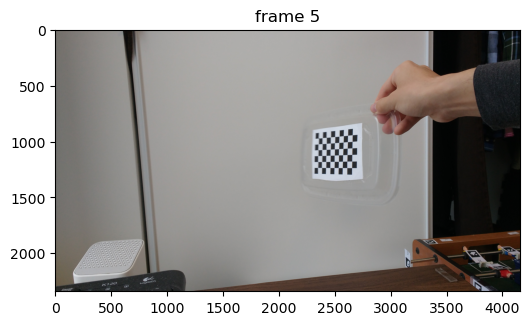

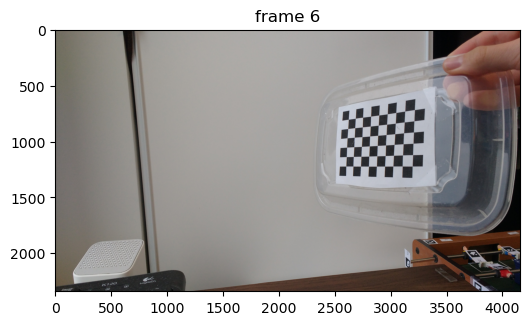

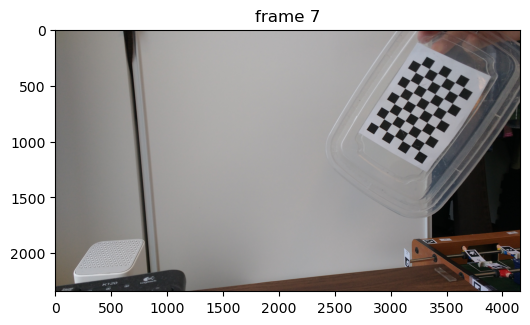

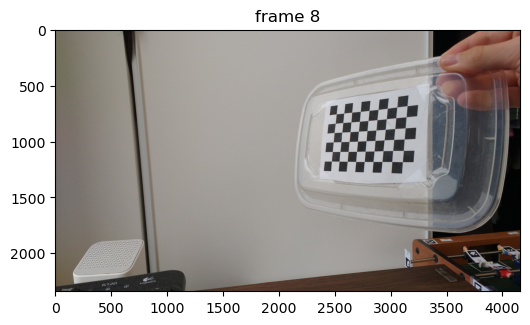

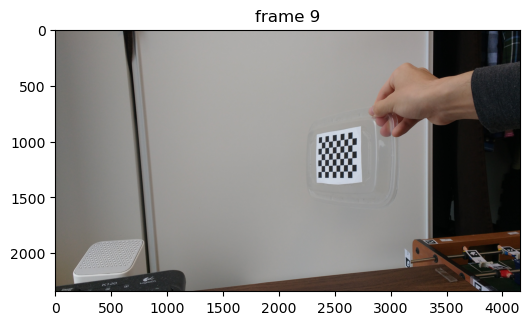

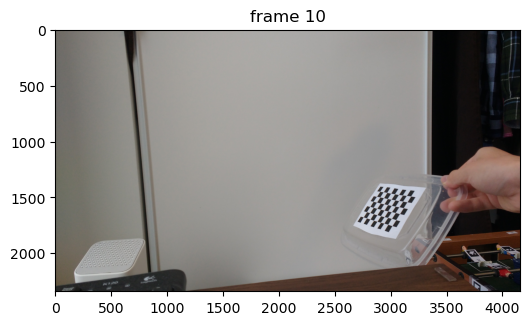

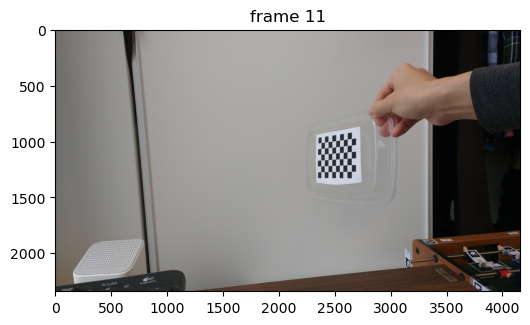

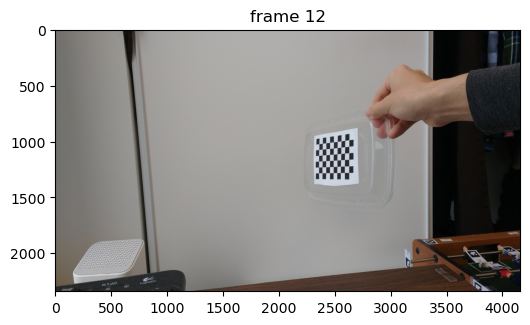

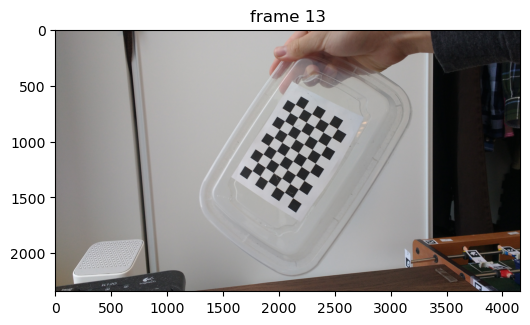

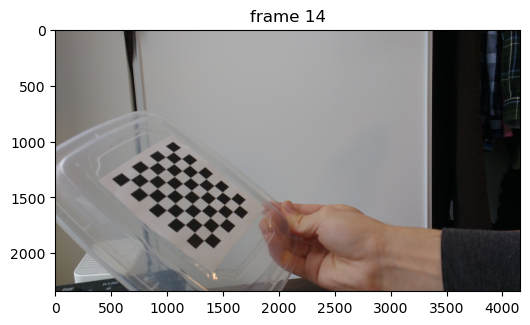

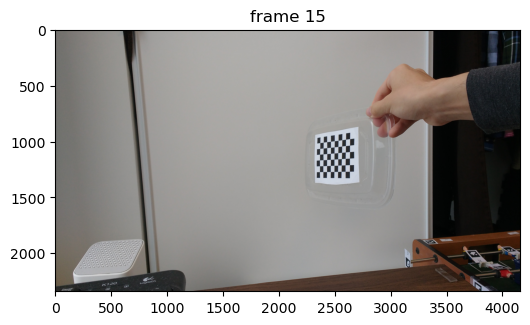

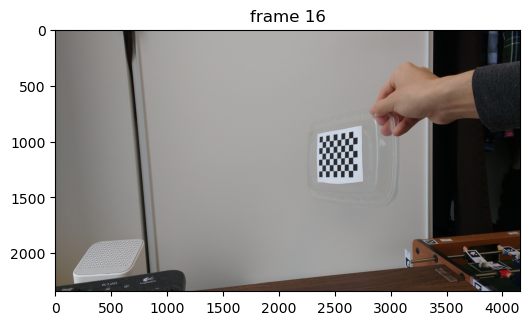

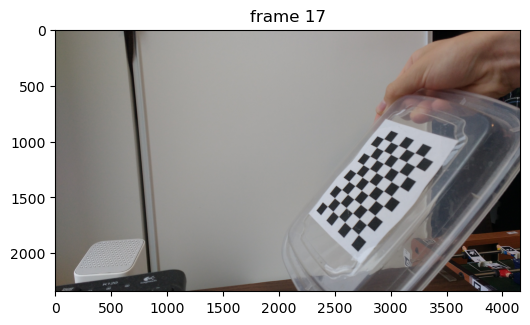

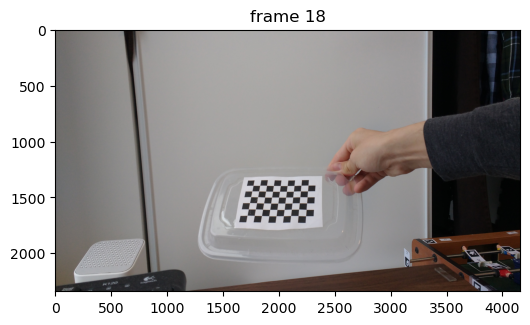

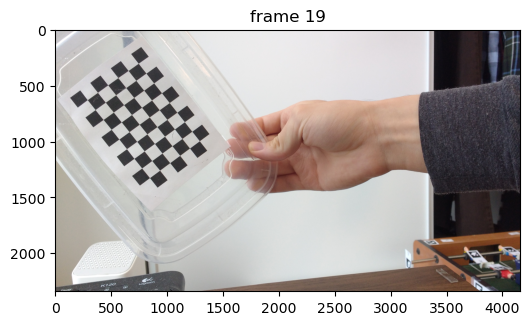

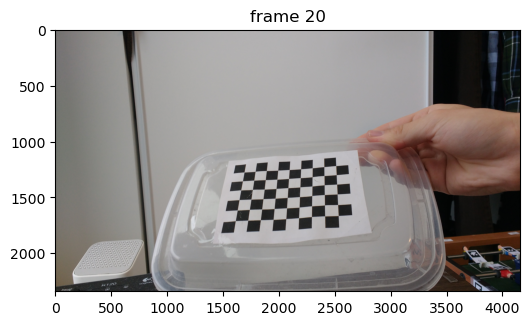

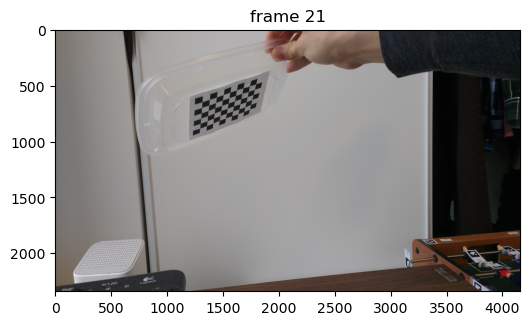

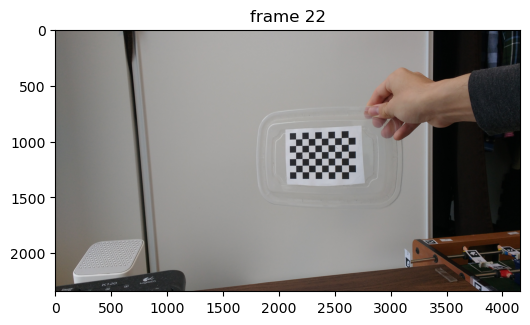

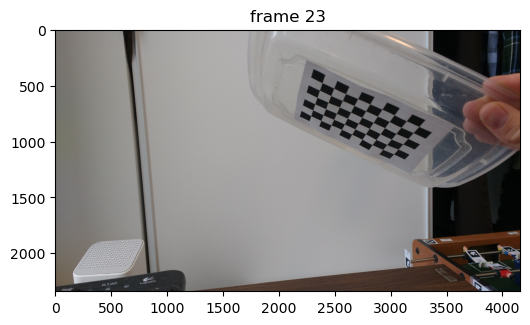

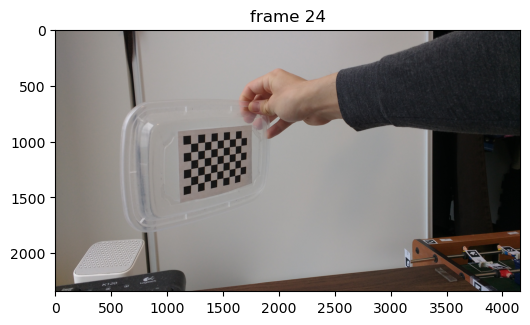

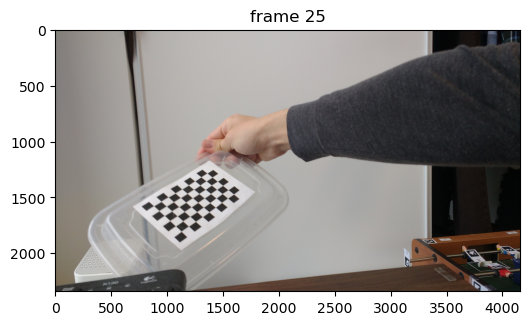

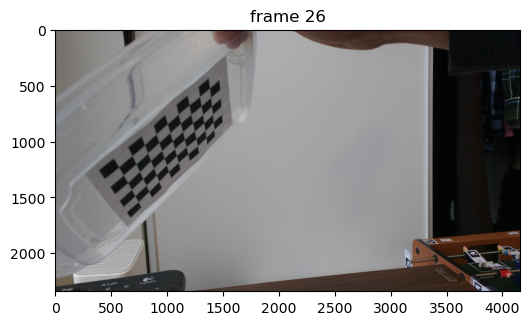

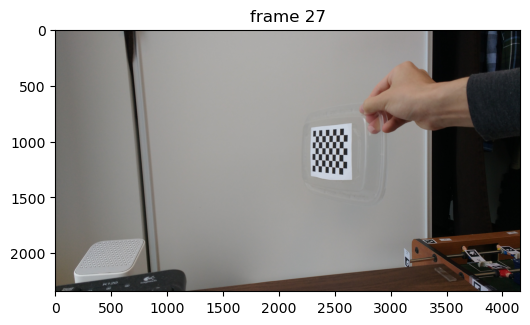

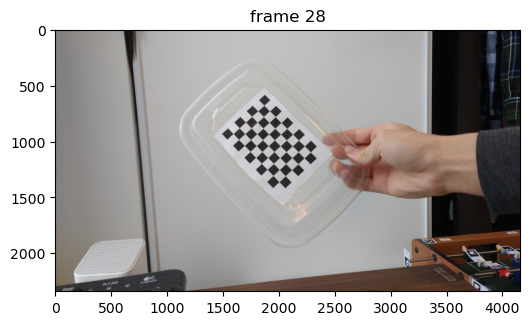

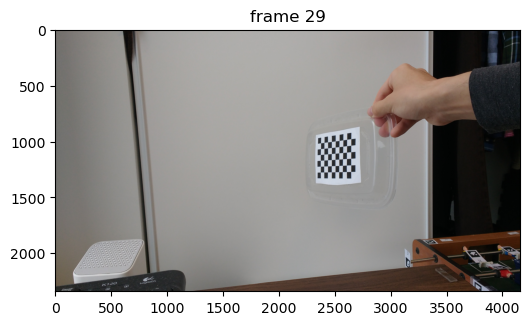

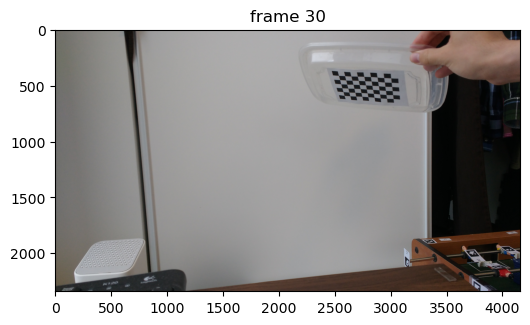

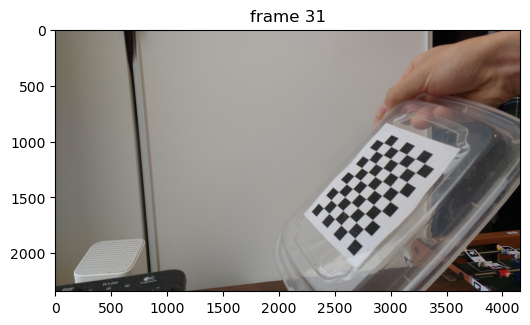

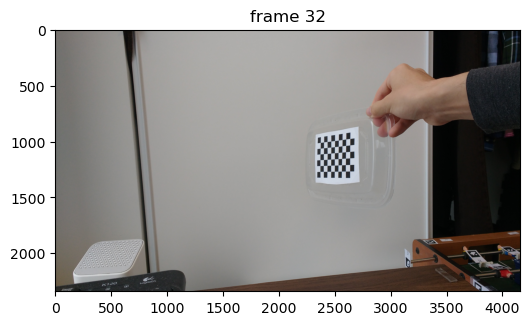

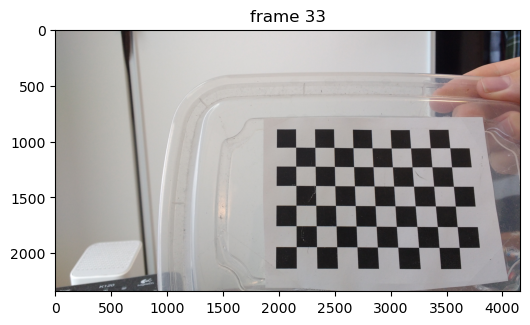

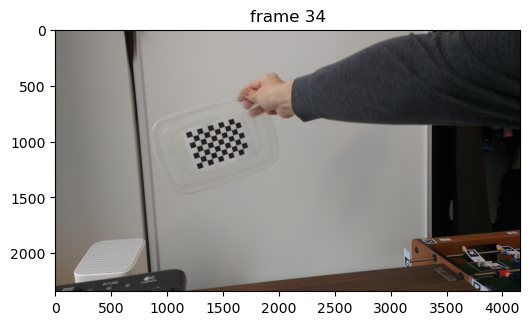

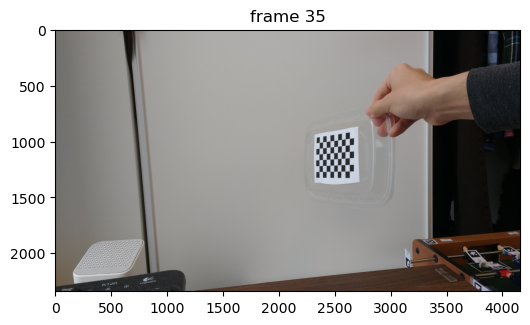

In [80]:
plt.close("all")
stride = 1
for idx in range(0, len(frame_name_subset), stride):
    frame_name = frame_name_subset[idx]
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {idx}")
    plt.imshow(Image.open(os.path.join(calibration_dir, frame_name)))

In [70]:
plt.close("all")

In [76]:
# calibration parameters
checkerboard_size = (9,6)
checker_board_points = checkerboard_size[0] * checkerboard_size[1]

In [77]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((checker_board_points,3), np.float32)
objp[:,:2] = np.mgrid[0:checkerboard_size[0],0:checkerboard_size[1]].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
 
# images = glob.glob('*.jpg')
images = frame_name_subset
 
for fname in images:
    img_path = calibration_dir + fname
    img = cv.imread(img_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, checkerboard_size, None)
 
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
 
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
 
        # Draw and display the corners
        cv.drawChessboardCorners(img, checkerboard_size, corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
 
cv.destroyAllWindows()

QObject::moveToThread: Current thread (0xf131e60) is not the object's thread (0x2a2c6c0).
Cannot move to target thread (0xf131e60)

QObject::moveToThread: Current thread (0xf131e60) is not the object's thread (0x2a2c6c0).
Cannot move to target thread (0xf131e60)

QObject::moveToThread: Current thread (0xf131e60) is not the object's thread (0x2a2c6c0).
Cannot move to target thread (0xf131e60)

QObject::moveToThread: Current thread (0xf131e60) is not the object's thread (0x2a2c6c0).
Cannot move to target thread (0xf131e60)

QObject::moveToThread: Current thread (0xf131e60) is not the object's thread (0x2a2c6c0).
Cannot move to target thread (0xf131e60)

QObject::moveToThread: Current thread (0xf131e60) is not the object's thread (0x2a2c6c0).
Cannot move to target thread (0xf131e60)

QObject::moveToThread: Current thread (0xf131e60) is not the object's thread (0x2a2c6c0).
Cannot move to target thread (0xf131e60)

QObject::moveToThread: Current thread (0xf131e60) is not the object's thread

In [78]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [79]:
print("ret=")
print(ret)
print("mtx=")
print(mtx)
print("dist=")
print(dist)

ret=
1.9390609576723874
mtx=
[[3.46997260e+03 0.00000000e+00 1.93754366e+03]
 [0.00000000e+00 3.47770950e+03 1.01943319e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist=
[[ 0.03628926  0.51850655 -0.01466579 -0.01775694 -1.2316409 ]]


In [81]:
outfile = calibration_dir + "calibration_data.out.npz"
np.savez(outfile, ret=ret, mtx=mtx, dist=dist)

In [82]:
npzfile = np.load(outfile)

print(sorted(npzfile.files))
print(npzfile['mtx'])
print(npzfile['dist'])
print(npzfile['ret'])

['dist', 'mtx', 'ret']
[[3.46997260e+03 0.00000000e+00 1.93754366e+03]
 [0.00000000e+00 3.47770950e+03 1.01943319e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 0.03628926  0.51850655 -0.01466579 -0.01775694 -1.2316409 ]]
1.9390609576723874


# Video Calibration

In [3]:
path = "/home/joseph/Videos/"
fileName = "20241110_152519.mp4"
filePath = path + fileName
capture = cv.VideoCapture(filePath)

In [4]:
while(capture.isOpened()):
	(grabbed, img) = capture.read()

	if grabbed == True:
		gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
		# Find the chess board corners

		ret, corners = cv.findChessboardCorners(gray, (9,6), cv.CALIB_CB_FAST_CHECK)
		# If found, add object points, image points (after refining them)
		if ret == True:
			objpoints.append(objp)
			corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
			# Draw and display the corners
			cv.drawChessboardCorners(img, (9,6), corners2, ret)
			imgpoints.append(corners2)


		#cv.imshow("gray", gray)
		#cv.imshow('img', img)

		# Press Q on keyboard to  exit
		key = cv.waitKey(10) & 0xFF

		# if the 'q' key is pressed, stop the loop
		if key == ord("q"):
			break
	else:
		break
		
capture.release()

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [29]:
print(ret)

0.9821617438924617


In [30]:
print(mtx)

[[798.86256178   0.         401.52277111]
 [  0.         812.90563717 319.32828483]
 [  0.           0.           1.        ]]


In [31]:
print(dist)

[[-3.51591693e-01  1.92604733e-01  3.20674878e-04  1.56190371e-04
  -1.16111572e-01]]


In [34]:
np.shape(rvecs)

(1752, 3, 1)

In [35]:
np.shape(tvecs)

(1752, 3, 1)

In [36]:
np.shape(imgpoints)

(1752, 54, 1, 2)

In [12]:
capture.isOpened()


False

In [18]:
print(objp)

[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [6. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]]


In [19]:
print(corners)
print(corners2)

[[[453.3572  318.88956]]

 [[436.55652 317.80707]]

 [[419.61777 316.77072]]

 [[402.60434 315.65845]]

 [[385.69437 314.63583]]

 [[369.01495 313.56836]]

 [[352.2621  312.61078]]

 [[335.48563 311.49918]]

 [[318.62506 310.5098 ]]

 [[454.58463 301.84848]]

 [[437.53345 300.68356]]

 [[420.66498 299.6309 ]]

 [[403.64438 298.51416]]

 [[386.759   297.55246]]

 [[369.75018 296.533  ]]

 [[353.04776 295.55334]]

 [[336.3618  294.5934 ]]

 [[319.41345 293.50772]]

 [[455.55753 284.77756]]

 [[438.66486 283.65512]]

 [[421.6503  282.50613]]

 [[404.592   281.54214]]

 [[387.5866  280.3865 ]]

 [[370.72357 279.4403 ]]

 [[353.9655  278.49347]]

 [[336.98538 277.55948]]

 [[320.13486 276.5658 ]]

 [[456.74503 267.73846]]

 [[439.67303 266.64597]]

 [[422.61365 265.53226]]

 [[405.56802 264.42224]]

 [[388.60425 263.3823 ]]

 [[371.6759  262.32214]]

 [[354.67105 261.3756 ]]

 [[337.69394 260.4294 ]]

 [[320.916   259.54547]]

 [[457.7155  250.30458]]

 [[440.8308  249.22173]]

 [[423.74863

In [20]:
np.shape(objp)

(42, 3)

In [21]:
gray.shape[::-1]

(800, 600)

In [37]:
capture = cv.VideoCapture(filePath)
(grabbed, img) = capture.read()
capture.release()



In [45]:
h,  w = img.shape[:2]
newcameramtx, roi=cv.getOptimalNewCameraMatrix(mtx,dist,(w,h),0,(w,h))

# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)


In [46]:
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult3.png',dst)

True

In [42]:
output2 = cv.undistort(img, mtx, dist, None, None)
cv.imwrite('calibresult1.png',dst)

True

In [43]:
output2 = cv.undistort(img, mtx, dist, None, newcameramtx)
cv.imwrite('calibresult2.png',dst)

True

In [44]:
cv.imwrite('original.png', img)

True

In [47]:
print(newcameramtx)

[[723.90893555   0.         401.49072616]
 [  0.         771.18841553 320.95426327]
 [  0.           0.           1.        ]]
